In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample Dataset
data = {
    'Location': ['Suburban', 'Urban', 'Rural', 'Suburban', 'Urban', 'Rural', 'Suburban', 'Urban', 'Rural', 'Suburban'],
    'Size (sqft)': [2000, 1500, 2500, 1800, 1600, 3000, 2100, 1400, 2400, 1700],
    'Bedrooms': [3, 2, 4, 3, 2, 4, 3, 2, 3, 3],
    'Bathrooms': [2, 1, 3, 2, 1, 3, 2, 1, 2, 2],
    'Price ($)': [250000, 300000, 220000, 230000, 320000, 210000, 260000, 330000, 225000, 240000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define input features and target variable
X = df[['Location', 'Size (sqft)', 'Bedrooms', 'Bathrooms']]
y = df['Price ($)']

# Preprocessing and model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Size (sqft)', 'Bedrooms', 'Bathrooms']),
        ('cat', OneHotEncoder(), ['Location'])
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Predicting on new data (optional)
new_data = pd.DataFrame({
    'Location': ['Urban'],
    'Size (sqft)': [1800],
    'Bedrooms': [3],
    'Bathrooms': [2]
})

predicted_price = pipeline.predict(new_data)
print(f'Predicted Price for new data: ${predicted_price[0]:,.2f}')


Mean Absolute Error (MAE): 32993.19727891157
Mean Squared Error (MSE): 1152442269.424777
R-squared (R²): 0.18048549729793628
Predicted Price for new data: $273,503.40


Actual Prices from the test set:
[225000 300000]


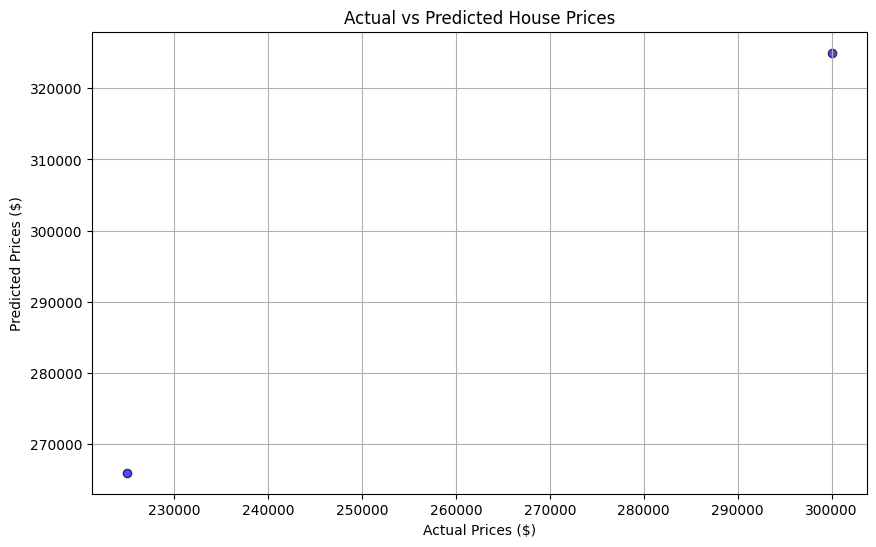

In [ ]:
import matplotlib.pyplot as plt

# Print actual prices from the test set
print("Actual Prices from the test set:")
print(y_test.values)

# Scatter plot of Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolors='k')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()


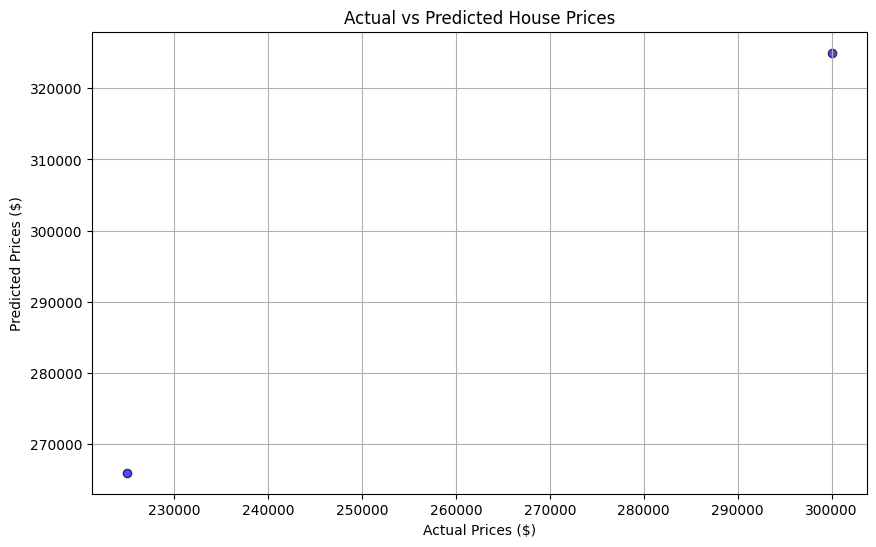

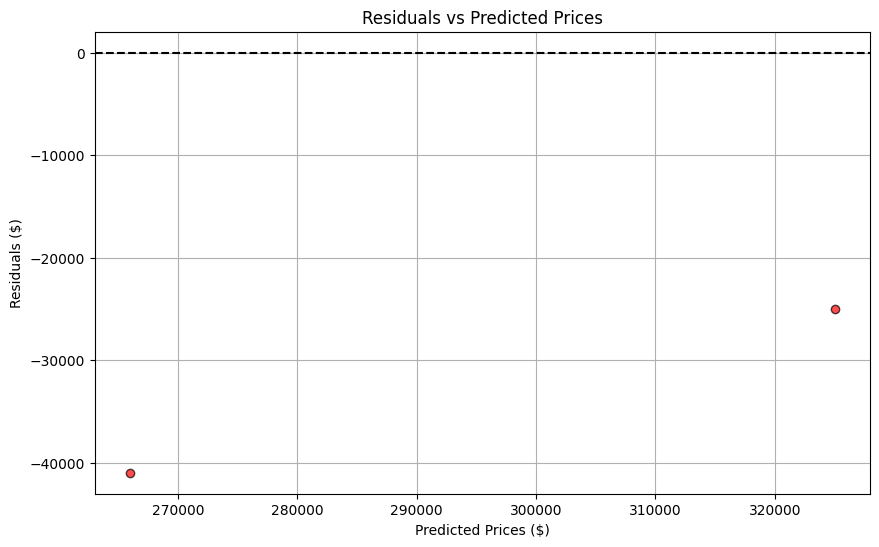

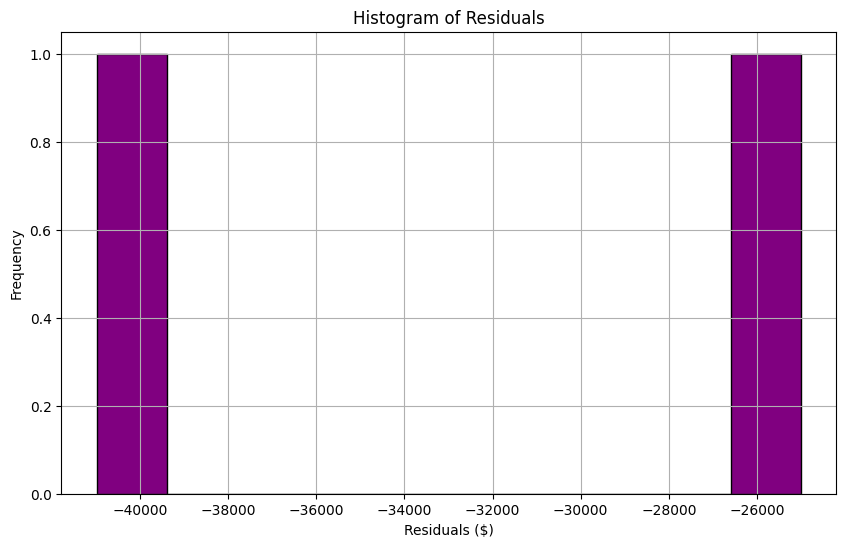

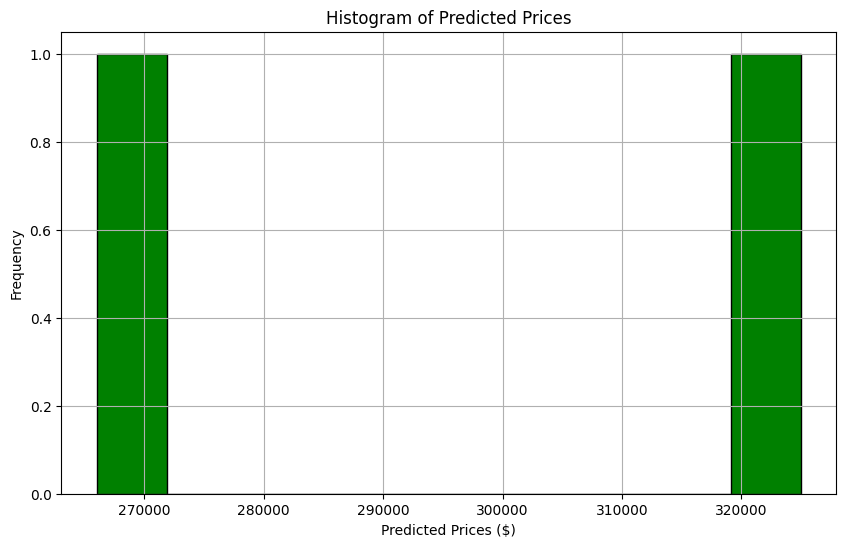

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolors='k')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red', alpha=0.7, edgecolors='k')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Prices ($)')
plt.ylabel('Residuals ($)')
plt.title('Residuals vs Predicted Prices')
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=10, color='purple', edgecolor='black')
plt.xlabel('Residuals ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

# Histogram of Predicted Prices
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=10, color='green', edgecolor='black')
plt.xlabel('Predicted Prices ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Prices')
plt.grid(True)
plt.show()


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are already defined as in your previous code
# Convert indices to a list for plotting
indices = np.arange(len(y_test))

# Create a bar width
bar_width = 0.35

# Set the position of bars on X axis
bar1 = indices - bar_width/2
bar2 = indices + bar_width/2

# Create the figure and axis objects
plt.figure(figsize=(10, 6))

# Plot bars for Actual Prices
plt.bar(bar1, y_test, bar_width, label='Actual Prices ($)', color='blue', alpha=0.7, edgecolor='k')

# Plot bars for Predicted Prices
plt.bar(bar2, y_pred, bar_width, label='Predicted Prices ($)', color='orange', alpha=0.7, edgecolor='k')

# Adding labels and title
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.title('Actual vs Predicted House Prices')
plt.xticks(indices, [f'Sample {i+1}' for i in indices])  # Label x-axis with sample indices
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'y_test' is not defined